## Module 5: Supervised Learning(Classification Models)

### **Prepared by: Dr. Hum Nath Bhandari, Department of Mathematics, RWU**

### **Course**: MATH 355/COMSC 415-Machine Learning 

###  **Case Study4** :  Building Clasification Models

### Name: Ella Costigan




### Overview 

In this case study, we build various classification models and implement them in real-world data. In addition, we perform various model selection strategies to identify the best model.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Important Classification Models

- Model 1: Logistic Regression
- Model 2: Support Vector Machine Classifier 
- Model 3: Decision Tree
- Model 4: K-Nearest Neighbours
- Model 5: Random Forest
- Model 6: Naive Bayes (Gaussian NB)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



## Problem 1 (Machine Learning In Sports): Predicting Win or Loss in Soccer Game

We want to predict **victory** or **defeat** in a football (soccer) match when we are given the number of goals a team scores. To do this, we consider the set of results of the football matches from the Spanish league and we build a classification model with it.



### Getting, Cleaning, and Exploring Data

**Question 1**. Read the **SP1.csv** file in a pandas DataFrame. You can find this data file in Bridges.

In [3]:
data = pd.read_csv("SP1.csv")
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,SP1,18/08/12,Celta,Malaga,0,1,A,0,0,D,...,1.78,21,-0.25,1.99,1.96,1.98,1.91,2.35,3.45,3.29
1,SP1,18/08/12,Mallorca,Espanol,2,1,H,1,1,D,...,1.68,20,-0.50,2.01,1.98,1.95,1.90,2.25,3.33,3.63
2,SP1,18/08/12,Sevilla,Getafe,2,1,H,2,0,H,...,1.84,23,-0.75,1.90,1.82,2.12,2.05,1.68,3.96,5.73
3,SP1,19/08/12,Ath Bilbao,Betis,3,5,A,0,3,A,...,1.92,18,-0.75,2.18,2.12,1.81,1.76,2.17,3.49,3.65
4,SP1,19/08/12,Barcelona,Sociedad,5,1,H,4,1,H,...,3.36,23,-2.75,1.98,1.93,1.99,1.93,1.09,13.96,35.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,1/6/2013,Mallorca,Valladolid,4,2,H,2,1,H,...,2.17,26,-1.00,1.96,1.89,2.02,1.97,1.54,4.50,6.72
376,SP1,1/6/2013,Real Madrid,Osasuna,4,2,H,2,0,H,...,3.74,25,-1.50,1.71,1.68,2.33,2.24,1.26,7.25,10.85
377,SP1,1/6/2013,Sevilla,Valencia,4,3,H,2,1,H,...,2.48,23,0.50,1.76,1.72,2.25,2.18,3.07,3.57,2.40
378,SP1,1/6/2013,Vallecano,Ath Bilbao,2,2,D,1,1,D,...,2.35,23,-0.25,1.90,1.83,2.13,2.05,2.14,3.67,3.56


**Question 2**. Select the following columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. 

where

**FTHG:** Home team goals

**FTAG:** Away team goals

**FTR:** H=Home Win, D=Draw, A=Away Win



In [4]:
data_new = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']].copy()
data_new

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H
...,...,...,...,...,...
375,Mallorca,Valladolid,4,2,H
376,Real Madrid,Osasuna,4,2,H
377,Sevilla,Valencia,4,3,H
378,Vallecano,Ath Bilbao,2,2,D


**Question 3**. Visualize a scatter plot of FTHG versus FTAG.

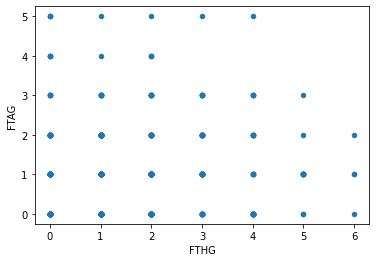

In [5]:
data.plot.scatter(x = 'FTHG', y = 'FTAG');

**Question 4**. Create two extra columns containing 'WG' for the number of goals of the winner and 'LG' the number of goals of the losser. 

In [6]:
def f1(row):
    return max(row['FTHG'], row['FTAG'])

def f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
data_new['WG'] = data_new.apply(f1, axis = 1)
data_new['LG'] = data_new.apply(f2, axis = 1)
data_new.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,WG,LG
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


**Question 5:** Built a **X_data** as 1 predictor with all goal scores and a **y_data** as target with a binary variable indicating win or loss (1 for win and 0 for loss).


In [7]:
x1 = data_new['WG']
y1 = np.ones(len(x1), dtype = np.int)
x2 = data_new['LG']
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])

data_clf = pd.DataFrame(x)
data_clf['y'] = y

data_clf.columns = ['goals', 'win_loss']

data_clf

,goals,win_loss
0,1,1
1,2,1
2,2,1
3,5,1
4,5,1
...,...,...
755,2,0
756,2,0
757,3,0
758,2,0


In [8]:
data_rand = data_clf.sample(n=data.shape[0], random_state = 20)

X_data = data_rand['goals']

y_data = data_rand['win_loss']

print("Size of X_data: " , X_data.shape)
print("Size of y_data: " , y_data.shape)

Size of X_data:  (380,)
Size of y_data:  (380,)


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size = 0.10, random_state = 20)

print("Size of X_train: " , X_train.shape)
print("Size of y_train: " , y_train.shape)

print("Size of X_test: " , X_test.shape)
print("Size of y_test: " , y_test.shape)

Size of X_train:  (342,)
Size of y_train:  (342,)
Size of X_test:  (38,)
Size of y_test:  (38,)


## Building Classification Models

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression();

X_train = X_train.values.reshape(-1,1)

log_reg_clf.fit(X_train, y_train)

LogisticRegression()

In [11]:
X_data = X_data.values.reshape(-1,1)
y_test_pred = log_reg_clf.predict(X_data)

## Model 1: Logistic Regression Classifier

In [12]:
print(log_reg_clf.coef_)
print(log_reg_clf.intercept_)

[[1.27995816]]
[-1.71618051]


In [13]:
print(y_train[:10])
print(y_test[:10])

753    0
284    1
642    0
586    0
551    0
36     1
204    1
737    0
357    1
571    0
Name: win_loss, dtype: int64
685    0
379    1
479    0
546    0
376    1
643    0
432    0
498    0
266    1
504    0
Name: win_loss, dtype: int64


In [14]:
print(y_test_pred[:5]) #Predicted Class
print(y_test[:5]) # actual class

[1 0 1 1 0]
685    0
379    1
479    0
546    0
376    1
Name: win_loss, dtype: int64


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.78070175, 0.73684211, 0.76315789])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_reg_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[147,  26],
       [ 56, 113]])

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.8129496402877698

In [18]:
recall_score(y_train, y_train_pred)

0.6686390532544378

## Combine all together

## Model 1: Logistic Regression Model

In [19]:
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

data_rand = data_clf.sample(n=data.shape[0], random_state = 20)

X_data = data_rand['goals']

y_data = data_rand['win_loss']

print("Size of X_data: " , X_data.shape)
print("Size of y_data: " , y_data.shape)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size = 0.10, random_state = 100)

print("Size of X_train: " , X_train.shape)
print("Size of y_train: " , y_train.shape)

print("Size of X_test: " , X_test.shape)
print("Size of y_test: " , y_test.shape)

log_reg_clf = LogisticRegression();

X_train = X_train.values.reshape(-1,1)

log_reg_clf.fit(X_train, y_train)

X_data = X_data.values.reshape(-1,1)
y_test_pred = log_reg_clf.predict(X_data)

print(log_reg_clf.coef_)
print(log_reg_clf.intercept_)

print(y_train[:10])
print(y_test[:10])

print(y_test_pred[:5]) #Predicted Class
print(y_test[:5]) # actual class

cross_val_score(log_reg_clf, X_train, y_train, cv=3, scoring = "accuracy")

y_train_pred = cross_val_predict(log_reg_clf, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

precision_score(y_train, y_train_pred)

recall_score(y_train, y_train_pred)

Size of X_data:  (380,)
Size of y_data:  (380,)
Size of X_train:  (342,)
Size of y_train:  (342,)
Size of X_test:  (38,)
Size of y_test:  (38,)
[[1.27520726]]
[-1.75959609]
22     1
754    0
525    0
347    1
141    1
424    0
685    0
346    1
45     1
745    0
Name: win_loss, dtype: int64
77     1
33     1
712    0
24     1
682    0
171    1
180    1
340    1
696    0
29     1
Name: win_loss, dtype: int64
[1 0 1 1 0]
77     1
33     1
712    0
24     1
682    0
Name: win_loss, dtype: int64


0.6503067484662577

## Problem 2 (Multiclass-Classification): Pattern Recognition (Heart Disease Classification)


### Problem Overview

- Heart diseases are often underestimated, but, in reality, they are the leading cause of death in the world. Among them, coronary artery disease (CAD) accounts for about a third of all deaths worldwide in people over 35 years of age. CAD is the result of arteriosclerosis, which consists in the narrowing of the blood vessels and the hardening of its walls. In some cases, CAD can completely block the influx of oxygen-rich blood to the heart muscle, causing a heart attack.

- In this example, we will try to predict a condition of heart disease through a classification machine learning models. To do this, we will use the Heart Disease Data Set, which is available in the **UCI Machine Learning Repository**.


- These databases contain several pieces of data information on heart disease instances. These are provided by the following four clinical institutions: Cleveland Clinic Foundation (CCF), Hungarian Institute of Cardiology (HIC), Long Beach Medical Center (LBMC), and University Hospital in Switzerland (SUH).


- More specifically, we will refer to the data that was made available by the CCF. 

- This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. 

- The goal is to predict the presence of heart disease in the patient. The target is an integer value from 0 (no presence) to 4. 

- Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1, 2, 3, 4) from absence (value 0).





## Features 

Each of the attributes are detailed as follows:

- **age**: Age in years

- **sex**: Sex (1 = male; 0 = female)

- **cp**: Chest pain type (Value 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain, Value 4: asymptomatic)

- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)

- **chol**: Serum cholestoral in mg/dl

- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- **restecg**: Resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

- **thalach**: Maximum heart rate achieved


- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment (Value 1: upsloping; Value 2: flat; Value 3: downsloping)
- **ca**: Number of major vessels (0-3) colored by flourosopy
- **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
- **HeartDisease**: Diagnosis of heart disease – angiographic disease status (Value 0: < 50% diameter narrowing; Value 1: > 50% diameter narrowing)—in any major vessel: attributes 59 through 68 are vessels



### Loading, Cleaning and Exploring Data

In [20]:
data2 = pd.read_csv("ClevelandData.csv")
data2

,67,1,4,160,286,0,2,108,1.1,2.1,2.2,3,3.1,2.3
0,67,1,4,120,229,0,2,129,1,3,2,2,7,1
1,37,1,3,130,250,0,0,187,0,4,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1,1,0,3,0
3,56,1,2,120,236,0,0,178,0,1,1,0,3,0
4,62,0,4,140,268,0,2,160,0,4,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,45,1,1,110,264,0,0,132,0,1,2,0,7,1
297,68,1,4,144,193,1,0,141,0,3,2,2,7,2
298,57,1,4,130,131,0,0,115,1,1,2,1,7,3
299,57,0,2,130,236,0,2,174,0,0,2,1,3,1


In [21]:
data2.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']

In [22]:
#data2.isnull().sum()
#data2.dtypes
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           301 non-null    int64 
 1   sex           301 non-null    int64 
 2   cp            301 non-null    int64 
 3   trestbps      301 non-null    int64 
 4   chol          301 non-null    int64 
 5   fbs           301 non-null    int64 
 6   restecg       301 non-null    int64 
 7   thalach       301 non-null    int64 
 8   exang         301 non-null    int64 
 9   oldpeak       301 non-null    int64 
 10  slope         301 non-null    int64 
 11  ca            301 non-null    object
 12  thal          301 non-null    object
 13  HeartDisease  301 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 33.0+ KB


In [23]:
data2.isin(['?']).sum(axis=0)

data2['ca'] = data2['ca'].replace('?',np.nan)
data2['thal'] = data2['thal'].replace('?',np.nan)

data2.dropna(how='any',inplace=True)

In [24]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,HeartDisease
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,54.471186,0.674576,3.162712,131.552542,247.267797,0.142373,0.989831,149.738983,0.325424,1.071186,1.596610,0.945763
std,9.037621,0.469329,0.958652,17.728962,52.118646,0.350026,0.994833,22.890816,0.469329,1.214293,0.614442,1.235986
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,1.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.500000,0.000000,2.000000,166.000000,1.000000,2.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,4.000000


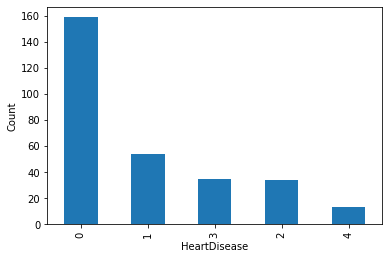

In [25]:
plot=data2['HeartDisease'].value_counts().plot(kind='bar')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

## Building Classification Model

### Model 1: Logistic Regression Model


In [26]:
import time as tm
X_data2 = data2.drop(['HeartDisease'], axis = 1)
y_data2 = data2['HeartDisease']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2,y_data2,test_size=0.2)

print("Training Sets:",  X_train.shape, y_train.shape)
print("Test Sets: ", X_test.shape, y_test.shape)

log_reg_clf2 = LogisticRegression();
start_time = tm.time()

log_reg_clf2.fit(X_train2, y_train2);
end_time = tm.time()

elapsed_time = end_time- start_time

print("Losgistic Regression Classifier Fitting time(in seconds): {:.4f}".format(elapsed_time))

y_test_pred2 = log_reg_clf2.predict(X_test2)

Training Sets: (342, 1) (342,)
Test Sets:  (38,) (38,)
Losgistic Regression Classifier Fitting time(in seconds): 0.0223


In [27]:
print(y_test_pred2[:10])
print(y_test2[:10])

[0 0 1 0 1 0 3 0 1 0]
12     0
48     0
102    3
1      0
187    2
195    0
249    1
206    0
125    3
9      0
Name: HeartDisease, dtype: int64


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ("Accuracy Score:", accuracy_score(y_test2, y_test_pred2))


print ("Confusion Matrix:\n", confusion_matrix(y_test2, y_test_pred2)) 

Accuracy Score: 0.4915254237288136
Confusion Matrix:
 [[25  4  0  0  0]
 [ 6  2  0  2  0]
 [ 1  4  1  3  0]
 [ 1  6  0  1  1]
 [ 1  0  0  1  0]]


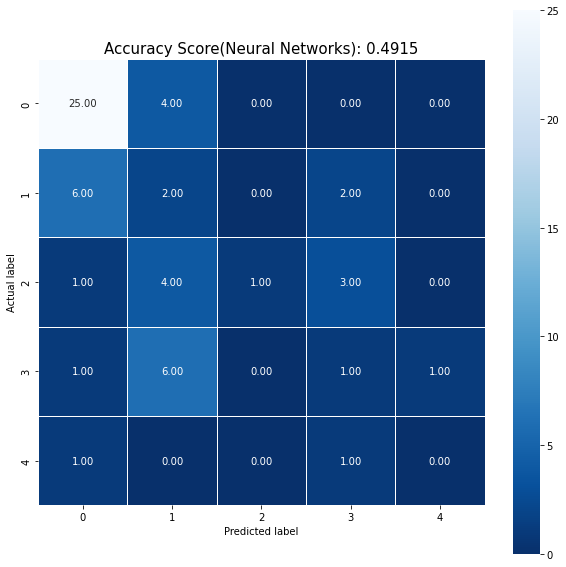

In [29]:
score = accuracy_score(y_test2, y_test_pred2)

cm = confusion_matrix(y_test2, y_test_pred2)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score(Neural Networks): {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);  

### Model 2: Building Random Forest 

Random Forest Classifier Fitting time(in seconds): 0.1001 

score: 0.4915254237288136 

confusion matrix: 
 [[26  2  0  1  0]
 [ 7  1  1  1  0]
 [ 1  4  1  3  0]
 [ 0  4  2  1  2]
 [ 1  0  1  0  0]]


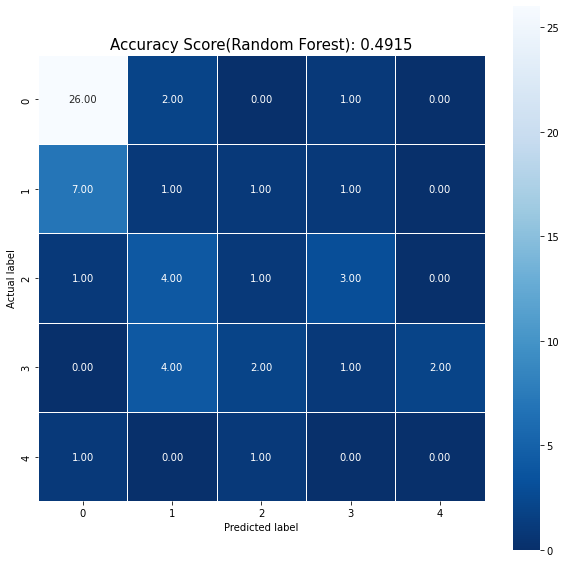

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();

start_time = tm.time()
rf.fit(X_train, y_train);
end_time = tm.time()

elapsed_time = end_time- start_time

print("Random Forest Classifier Fitting time(in seconds): {:.4f}".format(elapsed_time), "\n")  

rf.fit(X_train2, y_train2)
y_pred_rf = rf.predict(X_test2)

score = rf.score(X_test2, y_test2)
print("score:" , score , "\n")

cm = confusion_matrix(y_test2, y_pred_rf)
print("confusion matrix: \n", cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score(Random Forest): {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);